In [1]:
#Put an image of iris flower

In [2]:
import numpy as np, matplotlib.pyplot as plt
from sklearn.datasets import load_iris
%matplotlib inline

iris = load_iris()
X=iris.data[:50,[0,1]]+100*np.random.randn(50,2) # the first two features (but we can choose other ones)
X=(X-X.mean(axis=0))/X.std(axis=0)

In [3]:
def Proj(X, w): # projects the rows of X on w
    w = w / np.linalg.norm(w)
    m, n = X.shape
    return np.matmul(X.dot(w).reshape(m,1), w.reshape(1,n))

def L(X, Xhat): # computes the squared (Frobenius) distance
    return ((X-Xhat)**2).sum()

def plot_proj(X, w): # plot X, w, and the projections of X on w. X must have shape n-by-2
    xaxlim=[-3.5,3.5] # axis limits for plotting
    yaxlim=[-3.5,3.5] # axis limits for plotting
    w=w/np.linalg.norm(w)
    fig = plt.figure()
#     fig.hold()
    fig.gca().scatter(X[:,0], X[:,1])
    P=Proj(X,w)
    fig.gca().plot(10*np.array([-1,1])*w[0], 10*np.array([-1,1])*w[1])
    fig.gca().scatter(P[:,0], P[:,1], color="red", s=15)
    for i in range(X.shape[0]):
        fig.gca().plot([X[i,0], P[i,0]], [X[i,1], P[i,1]], color="red", linewidth=0.5)
    plt.xlim(xaxlim)
    plt.ylim(yaxlim)
    fig.gca().set_aspect('equal')
    print("w=",w)
    print("L=",L(X,P))
    print("var=",np.var(P))

In [3]:
X

array([[-1.23131319,  0.0843817 ],
       [-0.63131646,  1.09601395],
       [-0.04464285,  0.69323541],
       [ 0.17268022, -0.61069375],
       [ 0.44391412, -0.8556407 ],
       [-0.4542619 ,  0.35208566],
       [ 0.56115859, -0.43578377],
       [-0.20956908, -1.79471098],
       [ 0.24477812, -1.44311125],
       [-1.76180956, -1.17444455],
       [-0.05558347,  0.6350374 ],
       [-0.03905152,  0.20227229],
       [-0.63012218, -0.57128659],
       [ 0.10797099,  1.92656134],
       [-0.52927939,  0.12791548],
       [-0.42958313, -0.19879867],
       [-0.90298866,  0.61042779],
       [ 0.26190058, -1.49760055],
       [ 0.77384211,  0.82006988],
       [ 0.82247506, -1.51886022],
       [-0.09521866,  0.2433858 ],
       [ 0.58450879, -1.39721886],
       [-0.78768106,  0.67531313],
       [ 0.18660768, -0.25773938],
       [ 0.02761599,  0.43834815],
       [ 0.25755181,  0.04919317],
       [ 2.48824837,  2.11167736],
       [ 0.7960212 ,  1.48449264],
       [ 0.25869185,

w= [ 0.89241278 -0.45121994]
L= 46.56639835240093
var= 0.5343360164759908


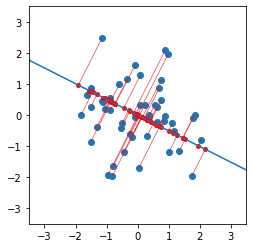

In [4]:
plot_proj(X, np.array([0.89,-0.45]))

w= [0. 1.]
L= 50.0
var= 0.5


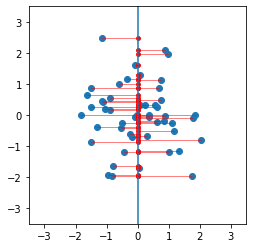

In [5]:
plot_proj(X, np.array([0,1]))

w= [0.70710678 0.70710678]
L= 54.26349587852938
var= 0.45736504121470645


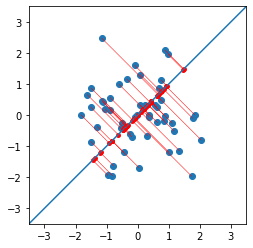

In [6]:
plot_proj(X, np.array([1,1]))

[[ 0.52106591 -0.26934744  0.5804131   0.56485654]
 [ 0.37741762  0.92329566  0.02449161  0.06694199]]
[2.93808505 0.9201649 ]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


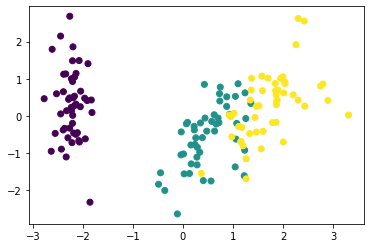

In [10]:
# PCA on the iris dataset, keeping the first two components
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X=iris.data
X=(X-X.mean(axis=0))/X.std(axis=0)
pca.fit(X)
print(pca.components_)
print(pca.explained_variance_)
P=pca.transform(X)
print(iris.target)
plt.scatter(P[:,0], P[:,1], c=iris.target)

In [11]:
# from sklearn.decomposition import PCA
# pca = PCA()
# R = np.random.randn(50,4)
# R /= R.std(axis=0)
# pca.fit(R)
# print(pca.components_)
type(iris.target)

numpy.ndarray